### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Multiple Linear Regression

### Splitting dataset 

In [5]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

### Using OneHotEncoder encoding categorical values

In [6]:
# Encoding categorcal data 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

### Training and testing dataset splitting 

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

### Feature Scaling using Standard Scaler 

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

### Training dataset using linear regression

In [19]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train_scaled,Y_train)

LinearRegression()

### Importing stats for statistical models 

In [20]:
#importing statsmodels for statistical visualizations
import statsmodels.api as sm

In [21]:
X_train_scaled=sm.add_constant(X_train_scaled)
X_test_scaled=sm.add_constant(X_test_scaled)

In [23]:
linear_reg=sm.OLS(Y_train,X_train_scaled).fit()
residuals=linear_reg.resid

### Seaborn for visualizing assumptions

In [25]:
import seaborn as sns

Text(0.5, 1.0, 'Linearity Assumption - Residuals VS Fitted values')

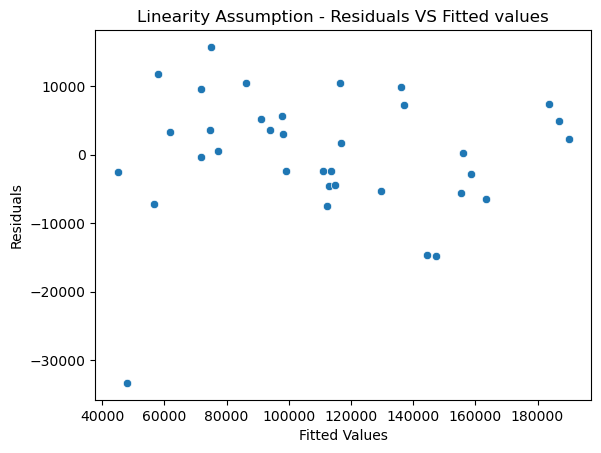

In [28]:
# Linearity assumption 
sns.scatterplot(x=linear_reg.fittedvalues,y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Linearity Assumption - Residuals VS Fitted values")

Text(0.5, 1.0, 'Independence Assumption - Residuals VS Fitted values')

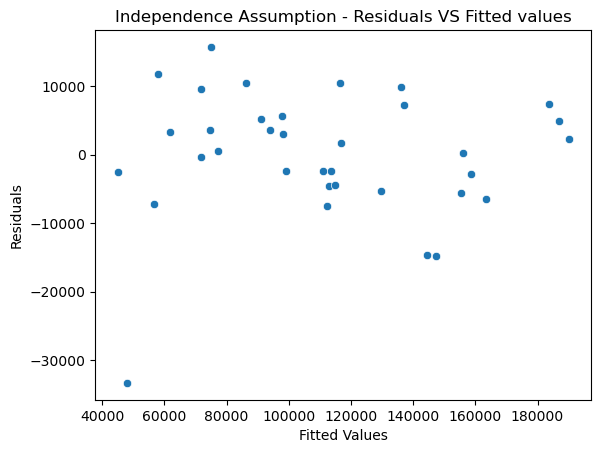

In [29]:
# Independence Assumption Residuals vs Observations
sns.scatterplot(x=linear_reg.fittedvalues,y=residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Independence Assumption - Residuals VS Fitted values")

Text(0.5, 1.0, 'Homoscedasticity assumption')

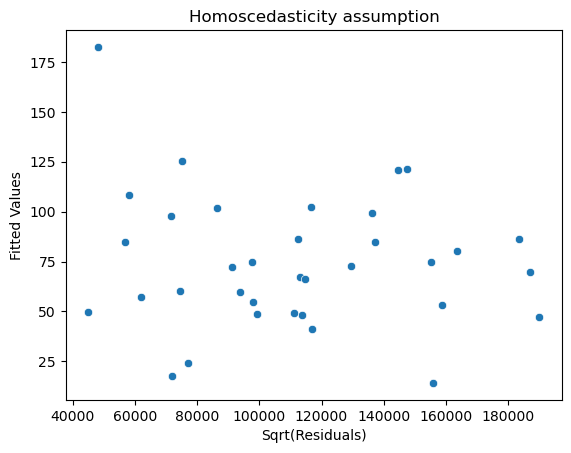

In [32]:
# Homoscedasticity assumption 
sns.scatterplot(x=linear_reg.fittedvalues,y=np.sqrt(np.abs(residuals)))
plt.xlabel('Sqrt(Residuals)')
plt.ylabel('Fitted Values')
plt.title('Homoscedasticity assumption')

Text(0.5, 1.0, 'Normality assumption ')

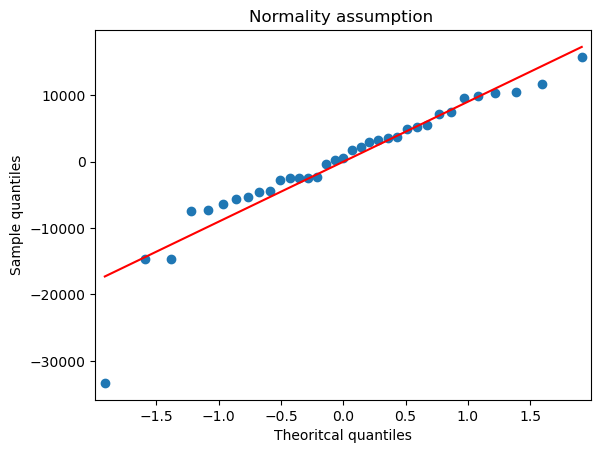

In [34]:
#Normality assumption quantile quantile plot
sm.qqplot(residuals,line='s')
plt.xlabel('Theoritcal quantiles')
plt.ylabel('Sample quantiles')
plt.title('Normality assumption ')

### Validating Mean Squared Error  and R2 score 

In [38]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(Y_test,Y_pred)
print("MEan Squared error:", mse)
r2=r2_score(Y_test,linear_reg.predict(X_test_scaled))
print('r2 score',r2)

MEan Squared error: 84826955.03532155
r2 score 0.9397108063355787
